# 연구과제(2) 풀이

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/mushrooms.xlsx", categories=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

## #02. 데이터 전처리 + 탐색적 데이터 분석

### [1] 데이터 라벨링

#### (1) 컬럼 이름 리스트 생성

In [3]:
columns = list(origin.columns)
print(columns)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


#### (2) 모든 컬럼에 대한 라벨링 수행

In [4]:
df = my_labelling(origin, *columns)
my_pretty_table(df.head())

+----+---------+-------------+---------------+-------------+-----------+--------+-------------------+----------------+-------------+--------------+---------------+--------------+----------------------------+----------------------------+--------------------------+--------------------------+-------------+--------------+---------------+-------------+---------------------+--------------+-----------+
|    |   class |   cap-shape |   cap-surface |   cap-color |   bruises |   odor |   gill-attachment |   gill-spacing |   gill-size |   gill-color |   stalk-shape |   stalk-root |   stalk-surface-above-ring |   stalk-surface-below-ring |   stalk-color-above-ring |   stalk-color-below-ring |   veil-type |   veil-color |   ring-number |   ring-type |   spore-print-color |   population |   habitat |
|----+---------+-------------+---------------+-------------+-----------+--------+-------------------+----------------+-------------+--------------+---------------+--------------+------------------------

### [2] 스피어만 상관분석

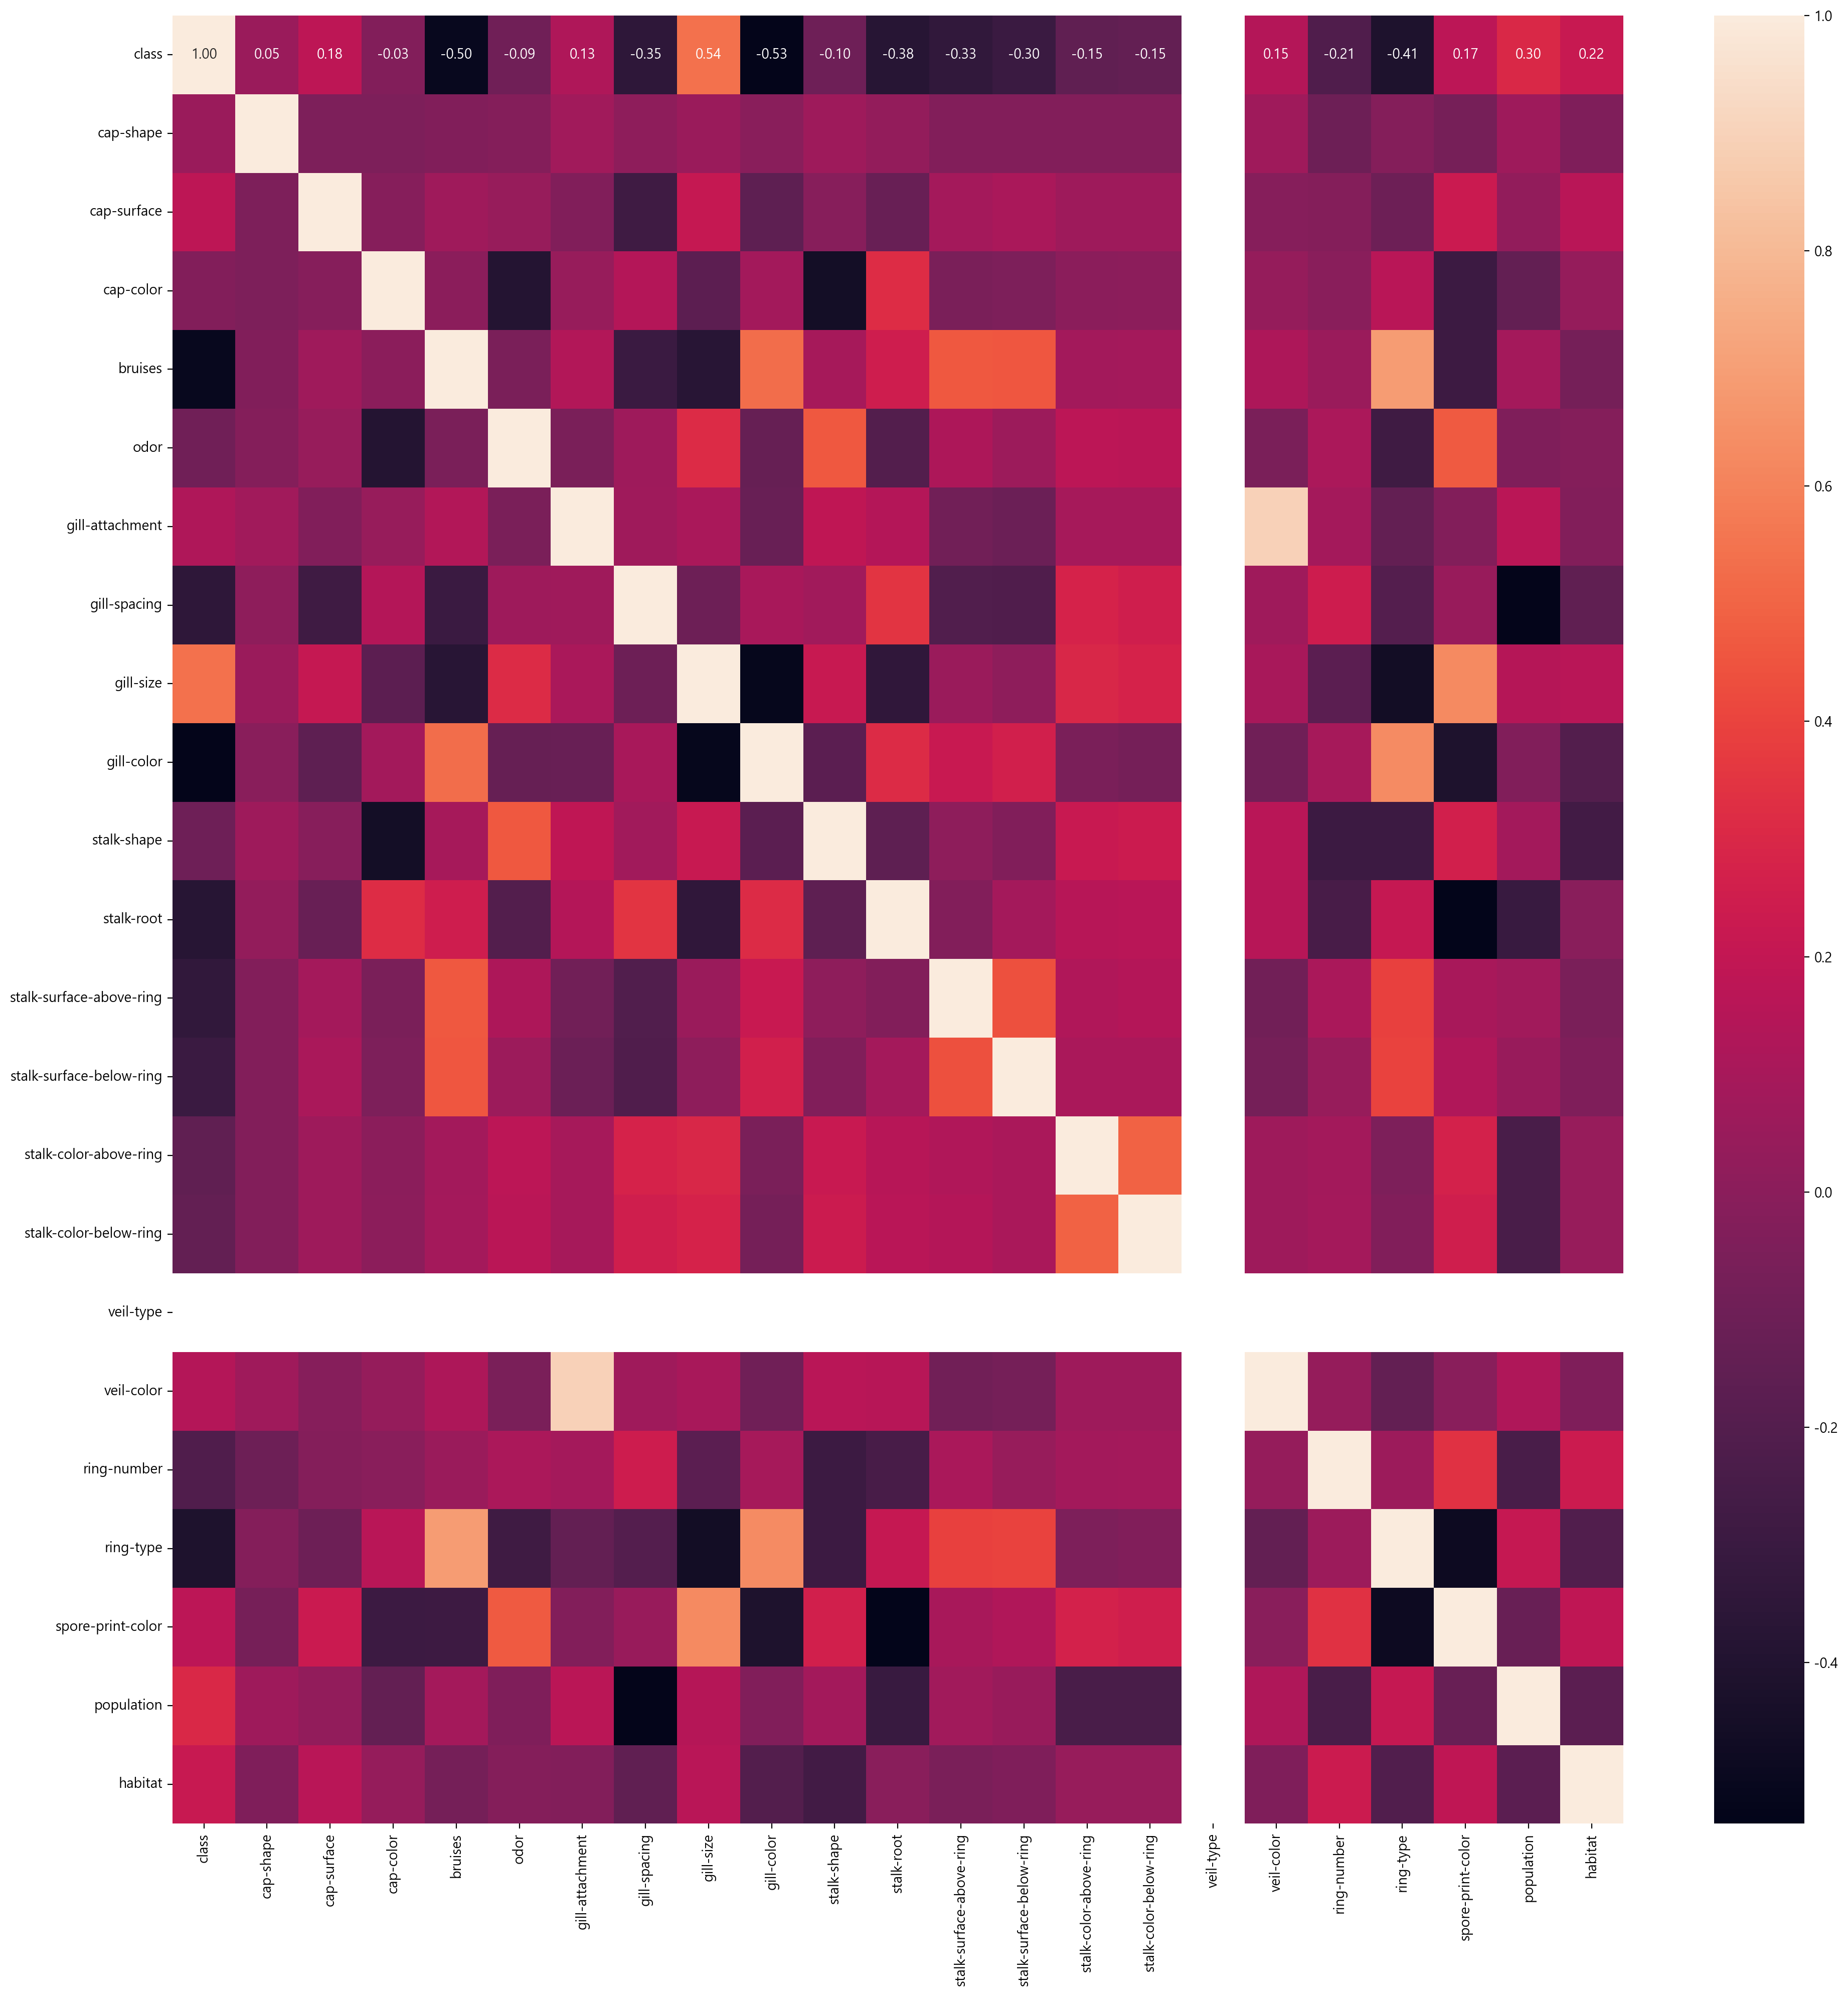

+----------------------------------------------------------+---------------+--------------+----------+
|                                                          |   correlation |      p-value | result   |
|----------------------------------------------------------+---------------+--------------+----------|
| ('class', 'cap-shape')                                   |     0.0529506 |   1.7951e-06 | True     |
| ('class', 'cap-surface')                                 |      0.178446 |  4.16672e-59 | True     |
| ('class', 'cap-color')                                   |    -0.0313841 |   0.00466921 | True     |
| ('class', 'bruises')                                     |      -0.50153 |            0 | True     |
| ('class', 'odor')                                        |    -0.0935516 |  2.92931e-17 | True     |
| ('class', 'gill-attachment')                             |        0.1292 |  1.39319e-31 | True     |
| ('class', 'gill-spacing')                                |     -0.34838

In [5]:
my_correlation(df, dpi=200, figsize=(20, 20))

## #03. 분석 모형 비교

### [1] 상관계수가 없는 `veil-type`을 제외한 모든 변수에 대한 분석

LogisticRegression({'n_jobs': -1, 'random_state': 1234}) {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier({'n_jobs': -1}) {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC({'n_jobs': -1, 'random_state': 1234}) {}
GaussianNB({}) {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier({'random_state': 1234}) {'criterion': ['gini', 'entropy']}
SGDClassifier({'n_jobs': -1, 'random_state': 1234, 'early_stopping': True}) {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----

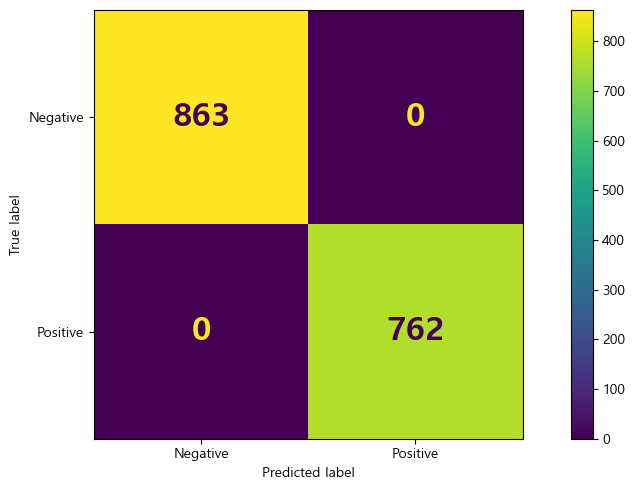


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


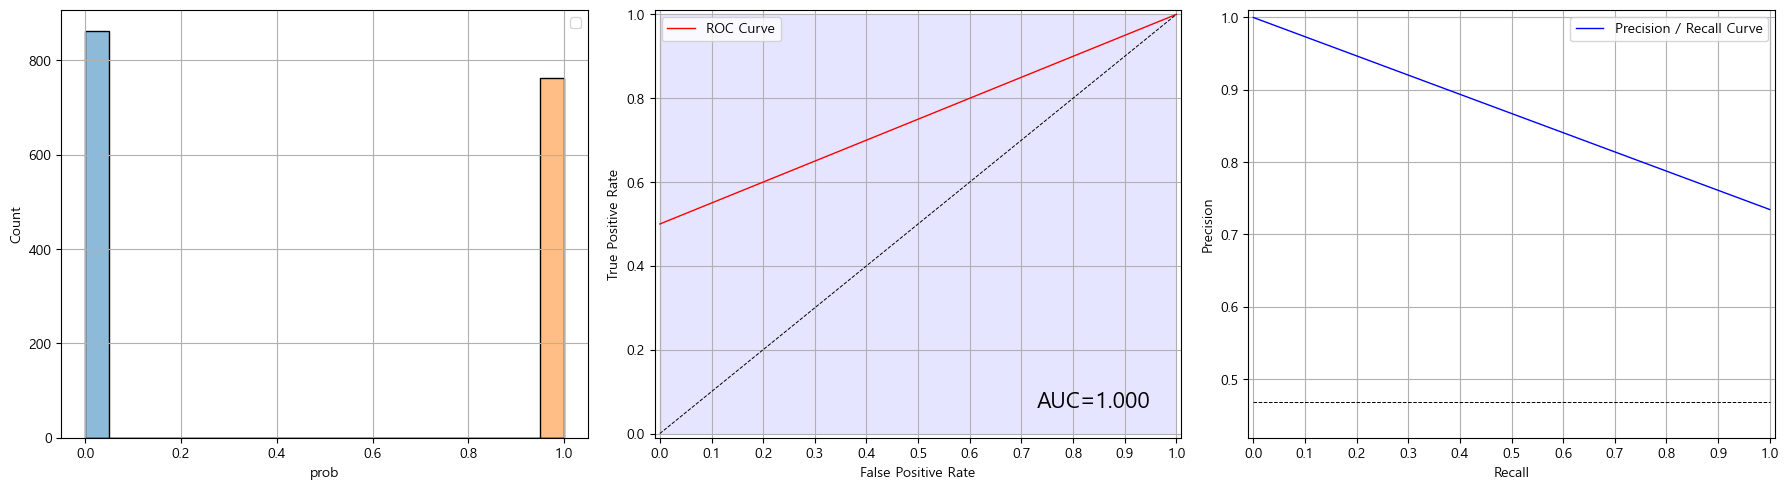


[학습곡선]


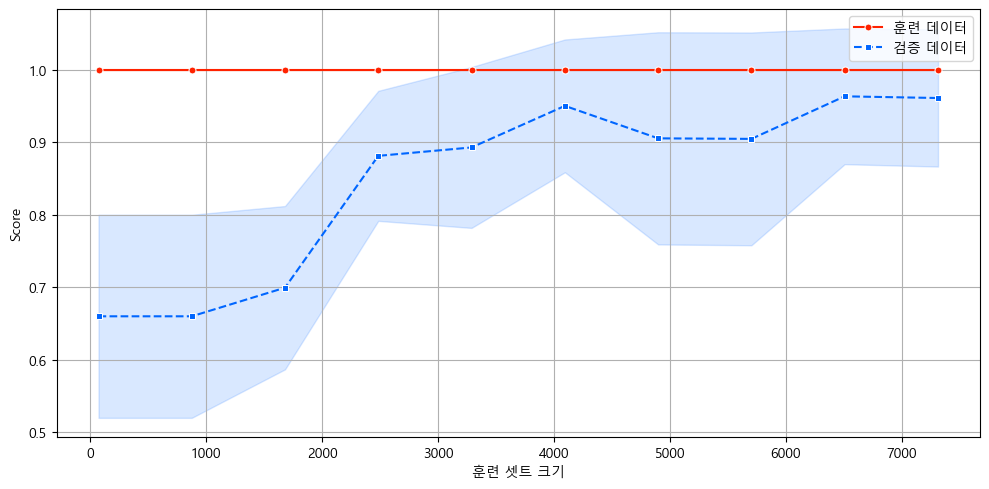

depth: 7 leaves: 21


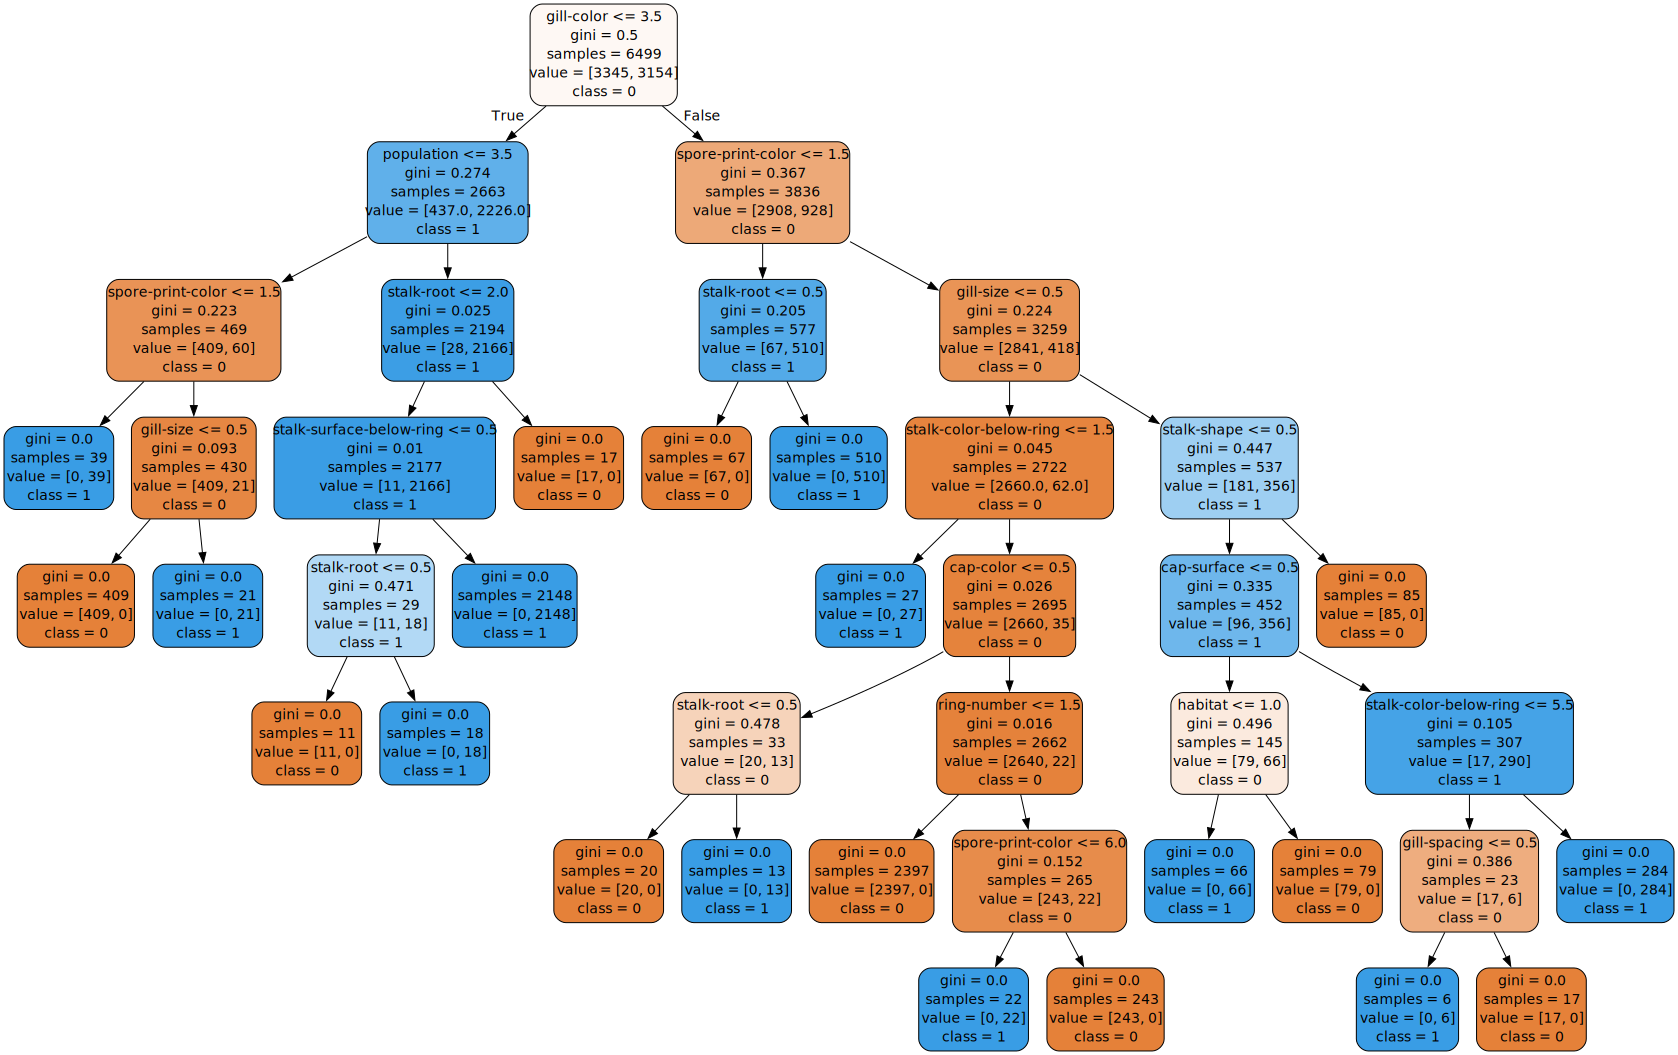

+----+---------+------------+--------------------------+---------+
|    |   index | 종속변수   | 독립변수                 |     VIF |
|----+---------+------------+--------------------------+---------|
|  0 |      15 | class      | veil-color               | 288.553 |
|  1 |       5 | class      | gill-attachment          | 254.806 |
|  2 |      16 | class      | ring-number              |  66.036 |
|  3 |      19 | class      | population               | 22.6805 |
|  4 |      18 | class      | spore-print-color        | 18.7814 |
|  5 |      14 | class      | stalk-color-below-ring   | 18.2049 |
|  6 |      13 | class      | stalk-color-above-ring   | 17.2603 |
|  7 |      17 | class      | ring-type                | 13.6555 |
|  8 |      12 | class      | stalk-surface-below-ring | 11.9049 |
|  9 |      11 | class      | stalk-surface-above-ring | 11.1024 |
| 10 |       3 | class      | bruises                  | 9.55878 |
| 11 |       9 | class      | stalk-shape              | 9.52204 |
| 1

{'DecisionTreeClassifier': DecisionTreeClassifier(random_state=1234),
 'GaussianNB': GaussianNB(var_smoothing=1e-05),
 'SVC': SVC(n_jobs=-1, random_state=1234),
 'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3),
 'LogisticRegression': LogisticRegression(C=100, max_iter=1000, n_jobs=1, random_state=1234),
 'SGDClassifier': SGDClassifier(alpha=0.001, early_stopping=True, eta0=0.1,
               learning_rate='adaptive', max_iter=4000, n_jobs=-1,
               random_state=1234),
 'best': DecisionTreeClassifier(random_state=1234)}

In [6]:
df2 = df.drop('veil-type', axis=1)

x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='class', test_size=0.2, scalling=False)

my_classification(x_train, y_train, x_test, y_test)

> 의사결정나무와 KNN 알고리즘에서 100% 정확도를 보였지만 VIF가 큰 변수들이 다수 관찰되었기 때문에 모델을 신뢰할 수 없다.

### [2] VIF값이 10을 초과하는 항목 제거 후 분석

LogisticRegression({'n_jobs': -1, 'random_state': 1234}) {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier({'n_jobs': -1}) {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC({'n_jobs': -1, 'random_state': 1234}) {}
GaussianNB({}) {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier({'random_state': 1234}) {'criterion': ['gini', 'entropy']}
SGDClassifier({'n_jobs': -1, 'random_state': 1234, 'early_stopping': True}) {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----

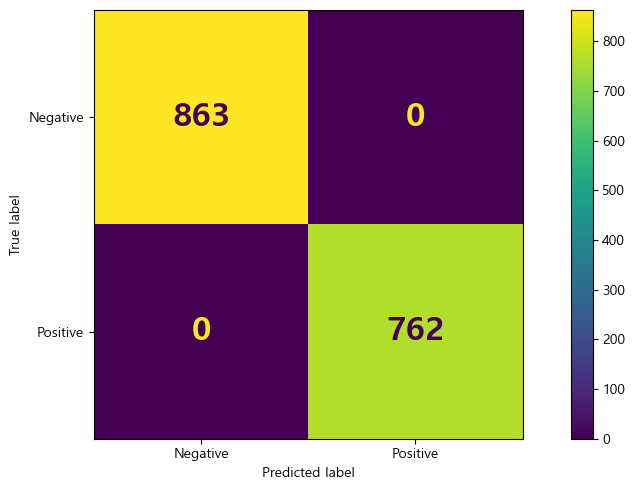


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


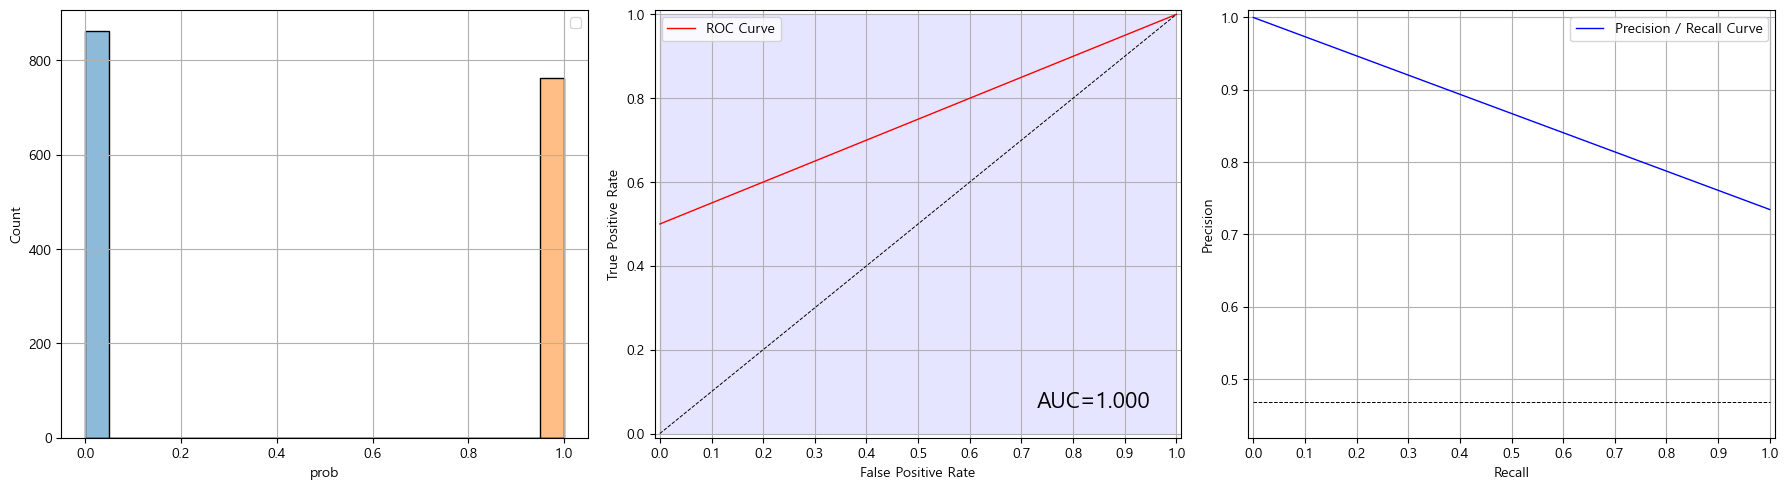


[학습곡선]


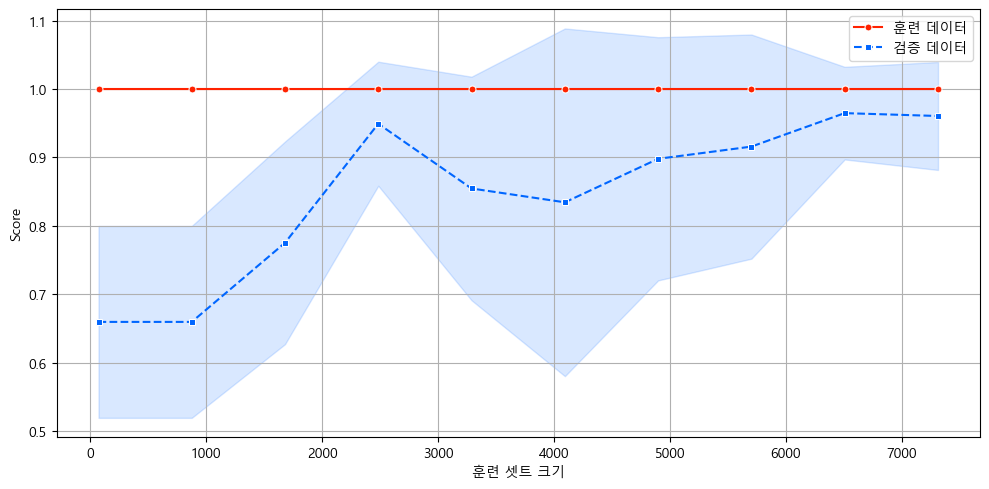

depth: 9 leaves: 14


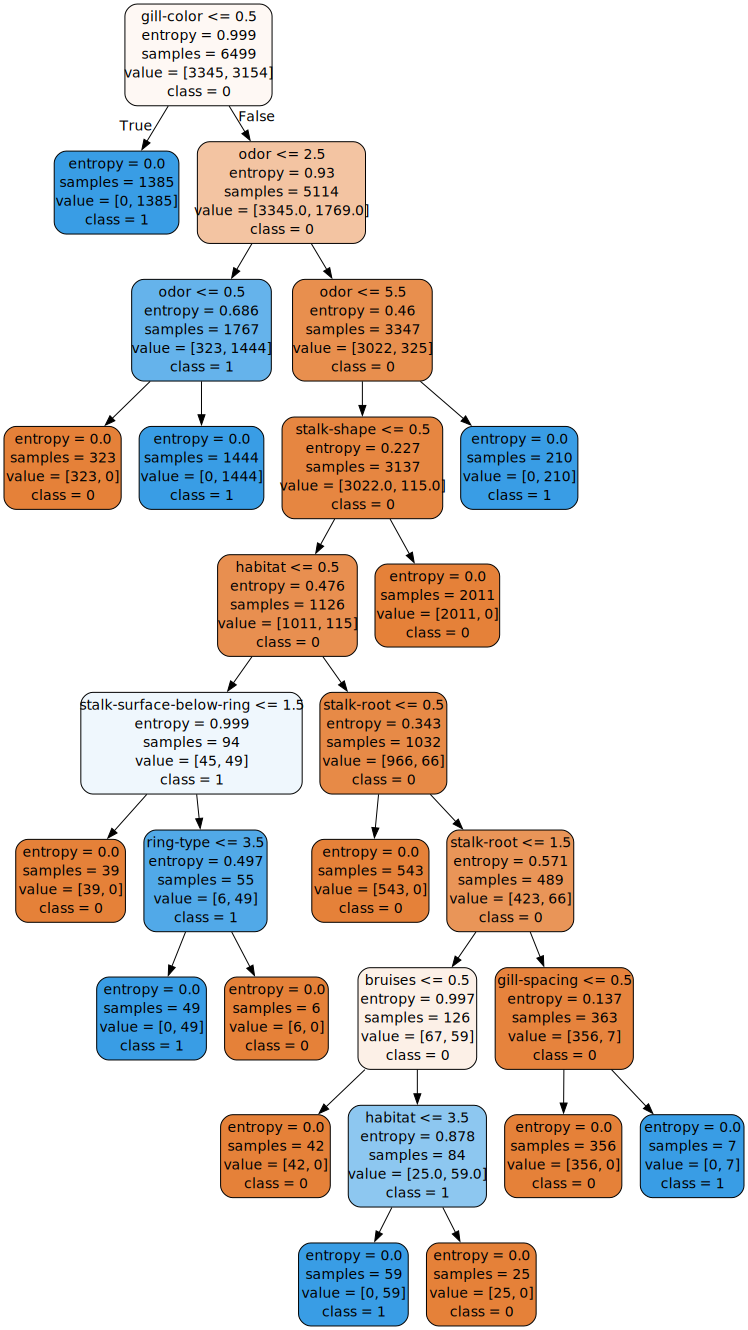

+----+---------+------------+--------------------------+---------+
|    |   index | 종속변수   | 독립변수                 |     VIF |
|----+---------+------------+--------------------------+---------|
|  0 |      10 | class      | stalk-surface-below-ring | 8.55177 |
|  1 |      11 | class      | ring-type                | 7.76022 |
|  2 |       4 | class      | odor                     | 6.65711 |
|  3 |       3 | class      | bruises                  | 6.14975 |
|  4 |       7 | class      | gill-color               | 5.76311 |
|  5 |       0 | class      | cap-shape                | 4.80846 |
|  6 |       2 | class      | cap-color                | 4.63554 |
|  7 |       8 | class      | stalk-shape              | 4.21428 |
|  8 |       1 | class      | cap-surface              | 3.60718 |
|  9 |       9 | class      | stalk-root               | 3.35969 |
| 10 |       6 | class      | gill-size                |  2.6693 |
| 11 |       5 | class      | gill-spacing             | 2.29297 |
| 1

{'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy', random_state=1234),
 'SVC': SVC(n_jobs=-1, random_state=1234),
 'GaussianNB': GaussianNB(),
 'LogisticRegression': LogisticRegression(C=100, max_iter=1000, n_jobs=1, random_state=1234),
 'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3),
 'SGDClassifier': SGDClassifier(alpha=0.001, early_stopping=True, eta0=0.1,
               learning_rate='adaptive', max_iter=3000, n_jobs=-1, penalty='l1',
               random_state=1234),
 'best': DecisionTreeClassifier(criterion='entropy', random_state=1234)}

In [8]:
df3 = my_vif_filter(df2, yname='class', threshold=10)

x_train, x_test, y_train, y_test = my_train_test_split(df3, yname='class', test_size=0.2, scalling=False)

my_classification(x_train, y_train, x_test, y_test)

> 전체적으로 성능이 향상되었으며 독립변수들 간의 자기상관성도 보이지 않는다.

### [3] 스케일링 후 분석

LogisticRegression({'n_jobs': -1, 'random_state': 1234}) {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier({'n_jobs': -1}) {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC({'n_jobs': -1, 'random_state': 1234}) {}
GaussianNB({}) {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier({'random_state': 1234}) {'criterion': ['gini', 'entropy']}
SGDClassifier({'n_jobs': -1, 'random_state': 1234, 'early_stopping': True}) {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----

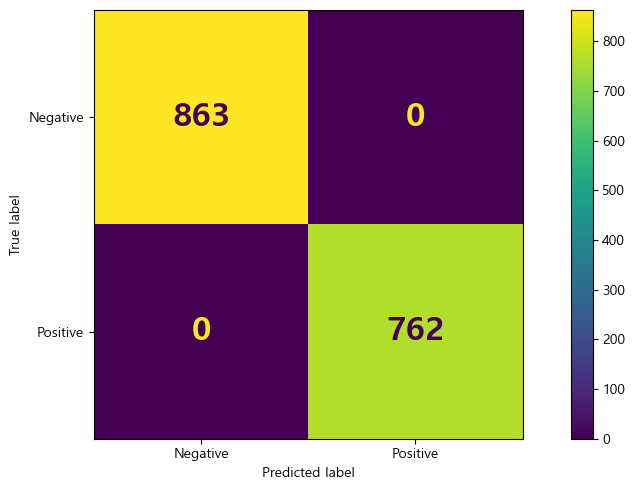


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


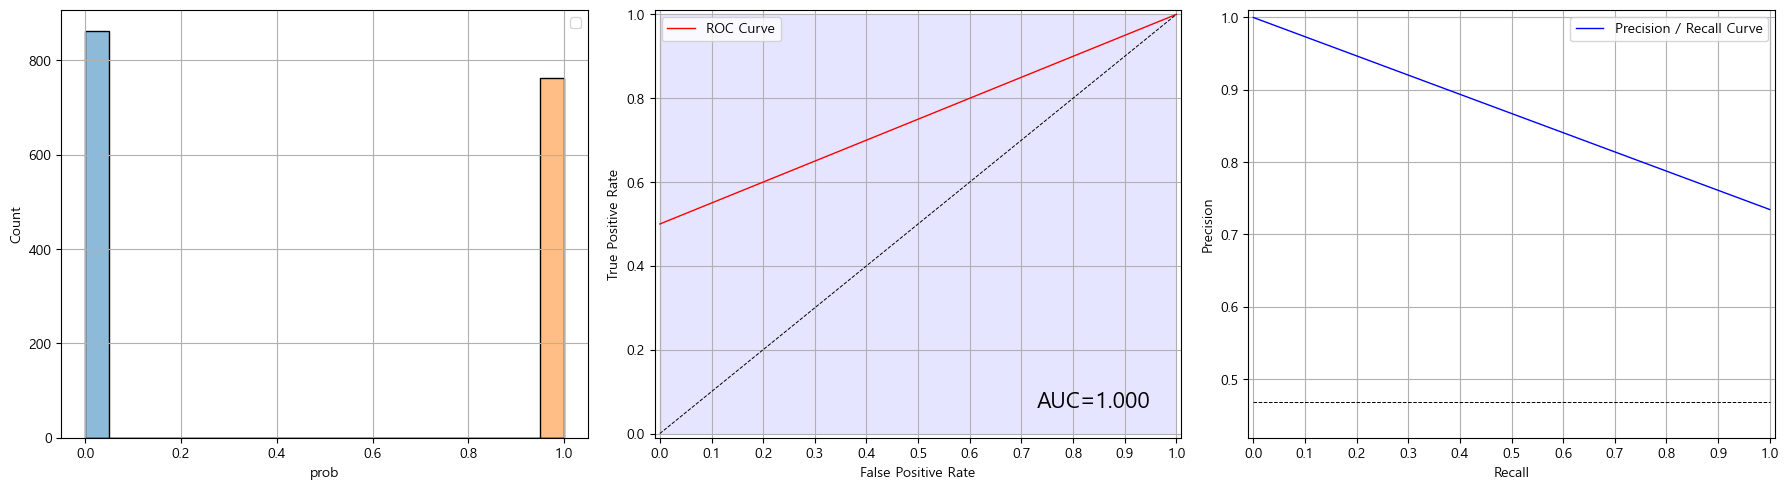


[학습곡선]


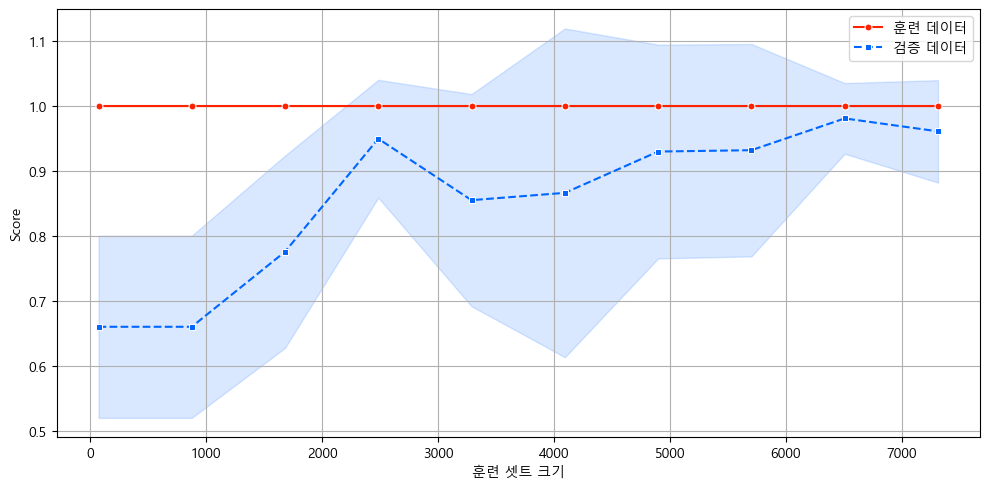

depth: 9 leaves: 14


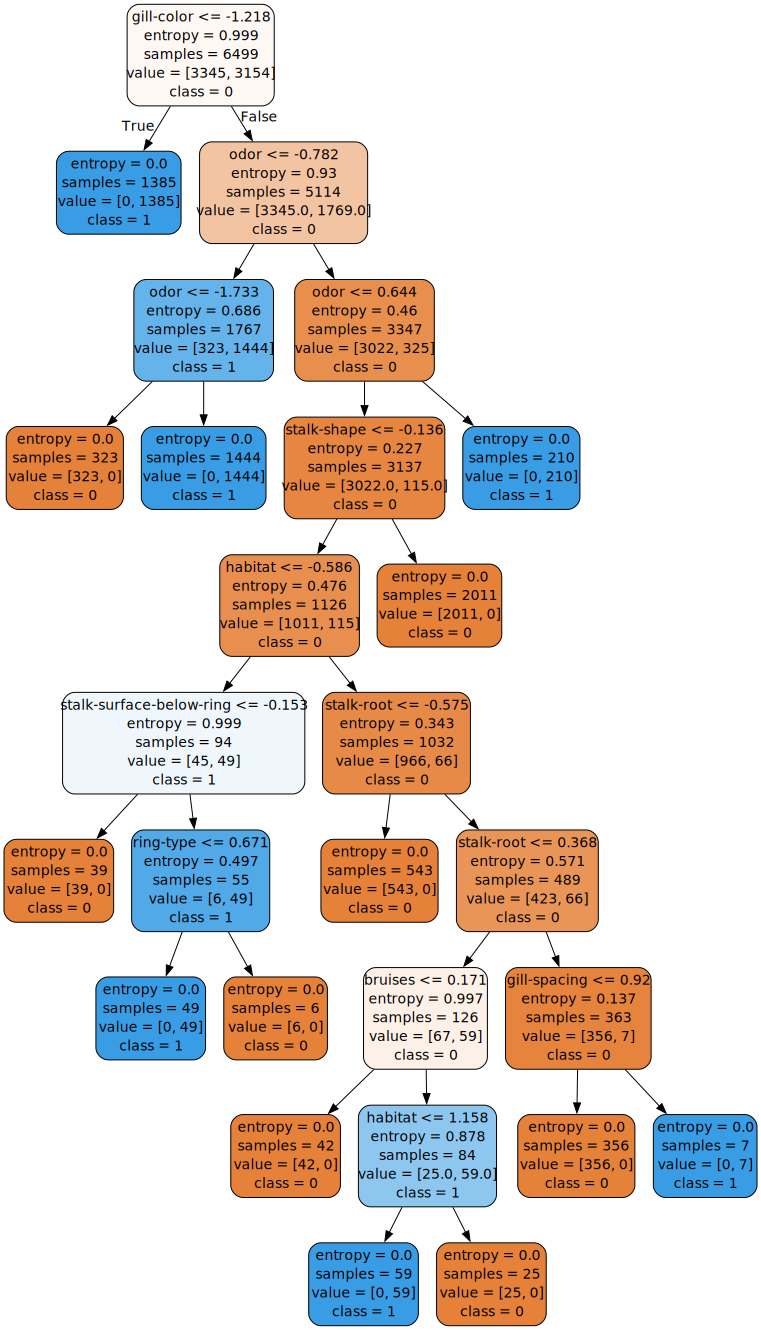

+----+---------+------------+--------------------------+---------+
|    |   index | 종속변수   | 독립변수                 |     VIF |
|----+---------+------------+--------------------------+---------|
|  0 |       3 | class      | bruises                  | 4.10842 |
|  1 |      11 | class      | ring-type                | 3.60709 |
|  2 |       8 | class      | stalk-shape              | 2.35862 |
|  3 |       7 | class      | gill-color               | 2.10028 |
|  4 |       5 | class      | gill-spacing             | 1.91044 |
|  5 |       6 | class      | gill-size                | 1.86025 |
|  6 |       9 | class      | stalk-root               | 1.60704 |
|  7 |       2 | class      | cap-color                | 1.53581 |
|  8 |       4 | class      | odor                     | 1.50054 |
|  9 |      10 | class      | stalk-surface-below-ring | 1.44013 |
| 10 |      12 | class      | habitat                  | 1.38464 |
| 11 |       1 | class      | cap-surface              | 1.19661 |
| 1

{'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy', random_state=1234),
 'GaussianNB': GaussianNB(),
 'SVC': SVC(n_jobs=-1, random_state=1234),
 'LogisticRegression': LogisticRegression(C=1, max_iter=1000, n_jobs=1, random_state=1234),
 'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=7,
                      weights='distance'),
 'SGDClassifier': SGDClassifier(alpha=0.01, early_stopping=True, eta0=0.5,
               learning_rate='adaptive', loss='modified_huber', max_iter=2000,
               n_jobs=-1, penalty='l1', random_state=1234),
 'best': DecisionTreeClassifier(criterion='entropy', random_state=1234)}

In [9]:
df4 = my_standard_scaler(df3, yname='class')
x_train, x_test, y_train, y_test = my_train_test_split(df4, yname='class', test_size=0.2, scalling=False)
my_classification(x_train, y_train, x_test, y_test)

> 성능에 변화가 없다. 현재 모델을 최종 분석 결과로 채택한다.

<!-- ### [2] 상관계수가 낮은 변수들 제거

상관계수가 `2` 이하인 항목들 제거 -->